## Import All Required Library

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read The CSV File

In [29]:
d1 = pd.read_csv('data\\KNN\\Breast_Cancer.csv')



#### 1.Clump Thickness -- growing unwanted tissues in breast 1 is small and 10 is large 
#### 2.Uniformity of Cell Size -- cell size in cancer 1- small
#### 3.Uniformity of Cell Shape -- cell shape in cancer 1-small
#### 4.Marginal Adhesion -- sign of malign of cancer 
#### 5.Single Epithelial Cell Size -- single layer of cells is called simple epithelia
#### 6.Bare Nuclei -- The presence of a dual population of epithelial and myoepithelial cells and of numerous bare nuclei
#### 7.Bland Chromatin -- Describes a uniform “texture” of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be coarser.
#### 8.Normal Nucleoli -- nucleouls in breast 
#### 9.Mitoses -- describes how quickly the cancer cells are multiplying or dividing using a 1 to 3 scale: 1 being the slowest, 3 the quickest.
#### 10.class -- 2--benign (no) 4--malignant(yes she has a cancer)

### Make A Copy of a Dataset

In [30]:
df = d1.copy()

# 1.EDA

### Understand the Data

In [31]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [32]:
df.shape

(699, 11)

In [33]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


### Find Missing Values in Dataset

In [34]:
df.isna().sum().sort_values(ascending=False)

Bare Nuclei                    16
Class                           0
Mitoses                         0
Normal Nucleoli                 0
Bland Chromatin                 0
Single Epithelial Cell Size     0
Marginal Adhesion               0
Uniformity of Cell Shape        0
Uniformity of Cell Size         0
Clump Thickness                 0
Sample code number              0
dtype: int64

<AxesSubplot:>

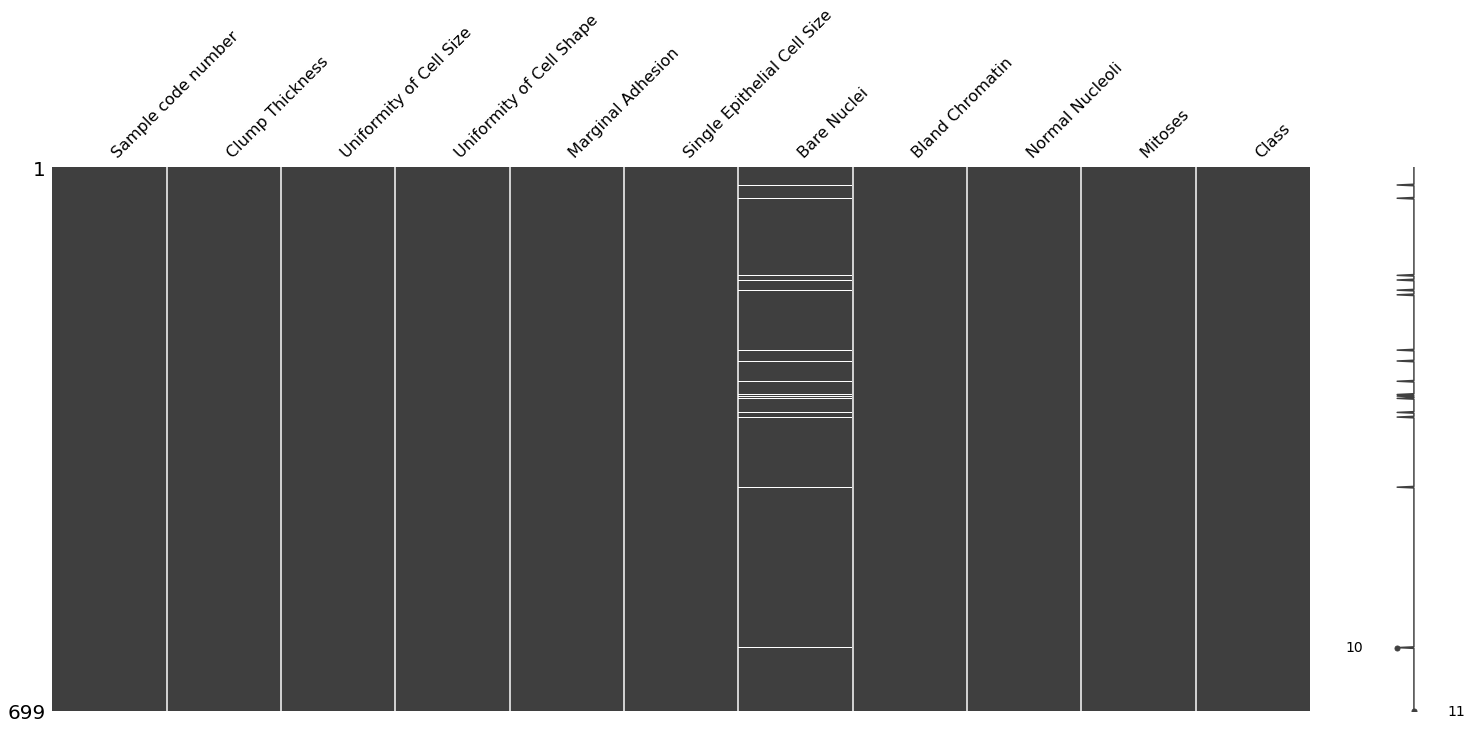

In [35]:
import missingno as mn
mn.matrix(df)

### As you Can See in Image There are Missing values in Bare Nuclei

### Analysis of Dataset in Deep

In [36]:
df.dtypes

Sample code number               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell Shape         int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [37]:
for i in df.columns:
    print(i,"-->",df[i].unique())
    print('---')

Sample code number --> [ 1000025  1002945  1015425  1016277  1017023  1017122  1018099  1018561
  1033078  1035283  1036172  1041801  1043999  1044572  1047630  1048672
  1049815  1050670  1050718  1054590  1054593  1056784  1057013  1059552
  1065726  1066373  1066979  1067444  1070935  1071760  1072179  1074610
  1075123  1079304  1080185  1081791  1084584  1091262  1096800  1099510
  1100524  1102573  1103608  1103722  1105257  1105524  1106095  1106829
  1108370  1108449  1110102  1110503  1110524  1111249  1112209  1113038
  1113483  1113906  1115282  1115293  1116116  1116132  1116192  1116998
  1117152  1118039  1120559  1121732  1121919  1123061  1124651  1125035
  1126417  1131294  1132347  1133041  1133136  1136142  1137156  1143978
  1147044  1147699  1147748  1148278  1148873  1152331  1155546  1156272
  1156948  1157734  1158247  1160476  1164066  1165297  1165790  1165926
  1166630  1166654  1167439  1167471  1168359  1168736  1169049  1170419
  1170420  1171710  1171795 

### Correlation

In [38]:
cor=df.corr()
cor = np.tril(cor,k=1)

<AxesSubplot:>

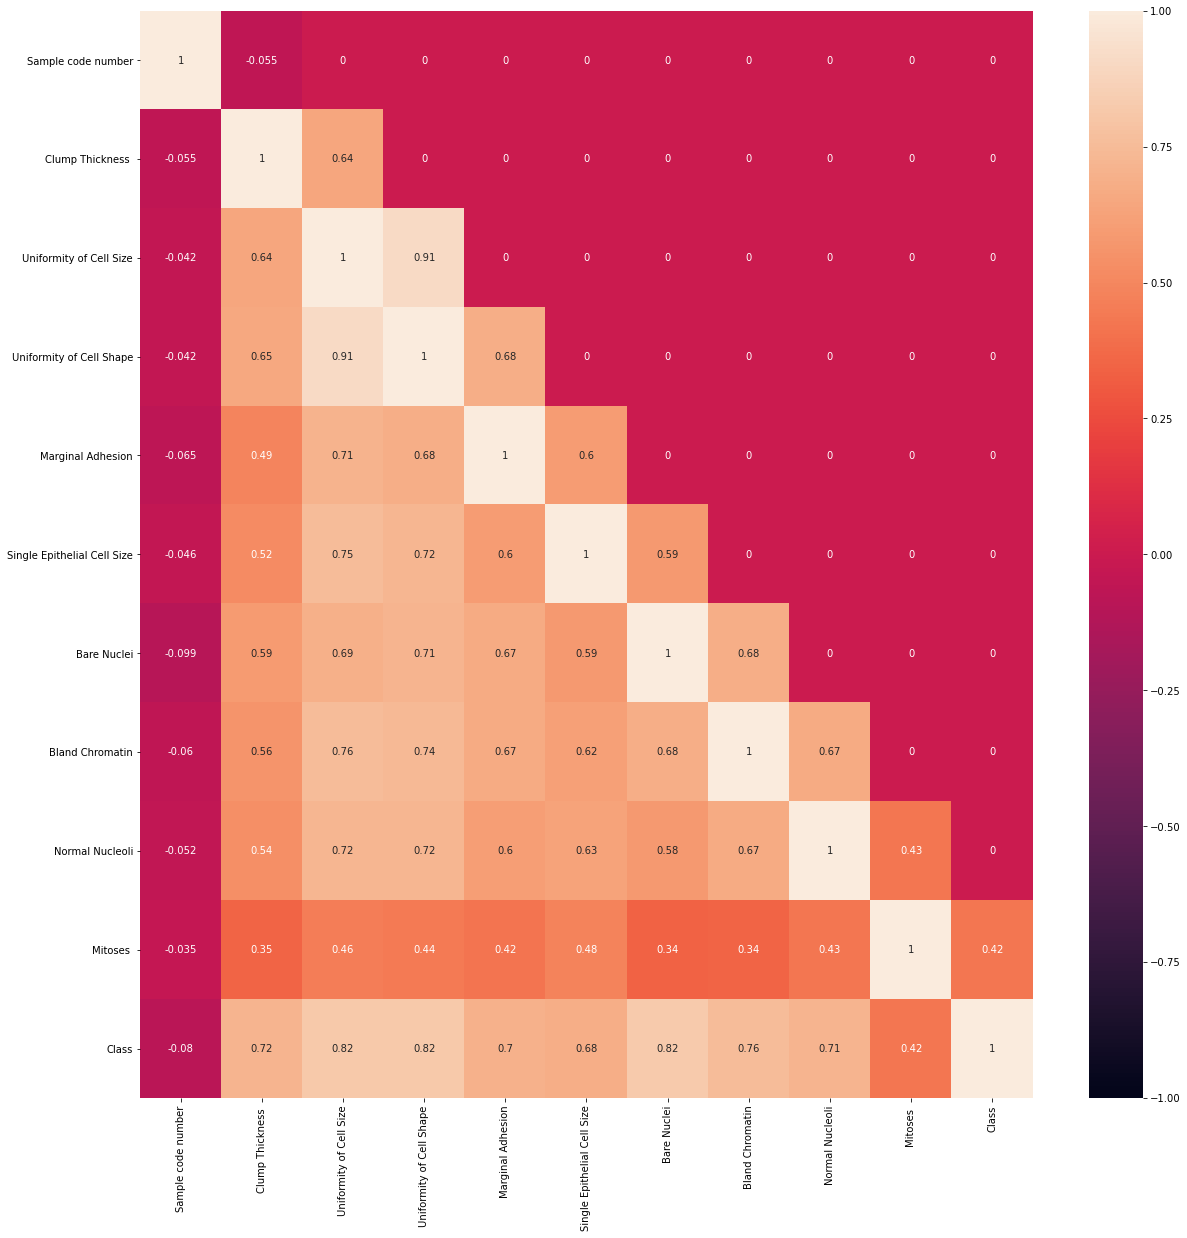

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1,xticklabels=df.columns,yticklabels=df.columns)

### Remove features which has highly correlation

In [40]:
remove = ['Uniformity of Cell Shape']


In [41]:
keep = [i for i in df.columns if i != 'Uniformity of Cell Shape']

In [42]:
df = df[keep]

### Check Class ImBalance

In [43]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:>

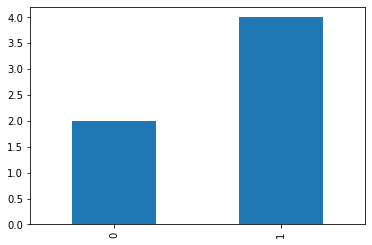

In [44]:
pd.Series(df['Class'].unique()).plot(kind='bar')

### Which is 2:1 consider 2-- as 0 or no 4 -- as 1 or yes or malignant

# 2.Feature Enginnering

### 1. Drop Missing Values In Bare Nuclei

In [45]:
df.dropna(axis=0,inplace=True)

In [46]:
df['Bare Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

In [47]:
df['Bare Nuclei'].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare Nuclei, dtype: int64

<AxesSubplot:>

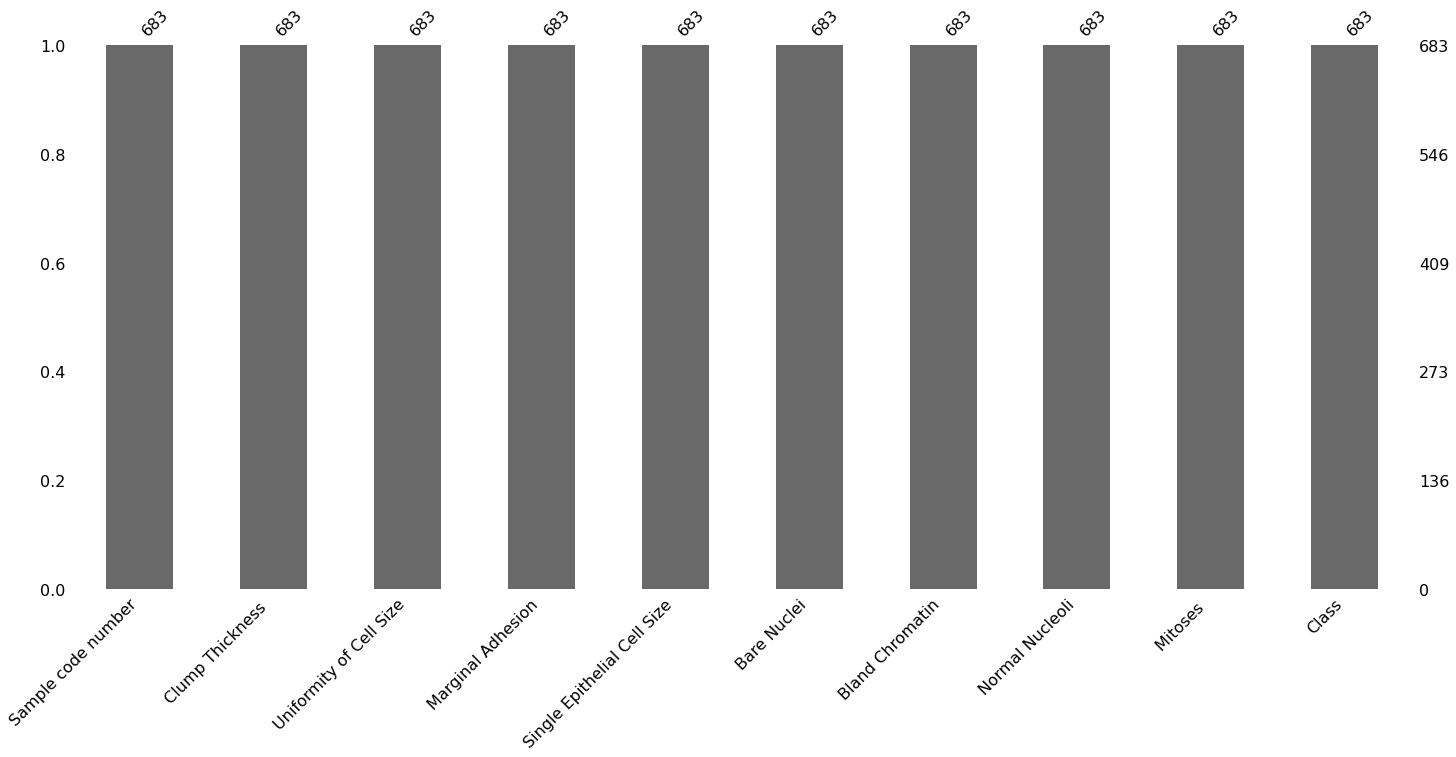

In [48]:
mn.bar(df)

### 2. Drop column  Sample code number is No Use

In [49]:
df.drop('Sample code number',axis=1,inplace=True)

# Goal(Matrix) :

## Here from the problem statement we can conclude that we try to reduce FNR rather than FPR because Here Actually she has Cancer but According to FNR, Predicted as Negative,not Cancer which lead her to problem if she not take diagnosis on time its too late for cancer cure

> **Import All Required Library For Machine Learning**

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

## 2. Feature Scaling

In [51]:
ms = MinMaxScaler()

In [52]:
scale_df = ms.fit_transform(df)

In [53]:
df.iloc[:,:] = scale_df

In [54]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0.0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0.0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0.0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0.0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0.0


In [55]:
df['Class'] = df['Class'].astype('int64')

## 4.Model Building 

###  Set x and y values

In [56]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [57]:
trainx,testx,trainy,testy = train_test_split(X,y,test_size=0.3,shuffle=True)

In [58]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(478, 8)
(205, 8)
(478,)
(205,)


> p = 1 manhattan distance and metric = 'manhattan'


> p = 2 euclidean distance and metric = 'euclidean' default is p=2


> p >= 3 chevbychev distance 


In [59]:
m1 = KNeighborsClassifier(n_jobs=-1,metric='euclidean').fit(trainx,trainy)

In [60]:
p1 = m1.predict(testx)

###  Confusion Matrix and Classification Report

In [62]:
confusion_matrix(testy,p1)

array([[121,   6],
       [  1,  77]], dtype=int64)

In [63]:
print(classification_report(testy,p1))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       127
           1       0.93      0.99      0.96        78

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



## Model Evalution 

### Cross-Validation

In [64]:
train_cv= np.mean(cross_val_score(m1,trainx,trainy,scoring='accuracy',cv=11,verbose=5,n_jobs=-1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  11 | elapsed:    7.0s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    7.0s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done   9 out of  11 | elapsed:    7.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    7.1s finished


In [65]:
test_cv = np.mean(cross_val_score(m1,testx,testy,scoring='accuracy',cv=11,verbose=5,n_jobs=-1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  11 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of  11 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  11 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.1s finished


In [66]:
print(train_cv)
print(test_cv)

0.9769844320584279
0.961190855927698


##  Choose best K Values

In [67]:
cv_score = list()
k_range = np.arange(3,62)

In [68]:
for k in k_range:
    m2 = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    acc = cross_val_score(m2,trainx,trainy,scoring='accuracy',cv=11,n_jobs=-1)
    cv_score.append(np.round(acc.mean(),4))

In [69]:
optimum_K = k_range[cv_score.index(max(cv_score))]

In [70]:
optimum_K

5

## K=5 which is already Build On model 1

## Plot The Graph For Finding K

Text(0, 0.5, 'Accuracy')

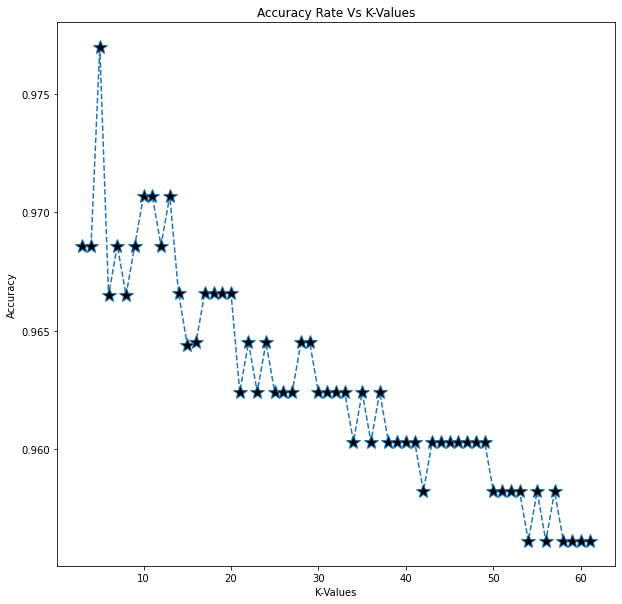

In [72]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(3,62),cv_score,marker = '*',markerfacecolor='black',markersize=15,linestyle = '--')
plt.title('Accuracy Rate Vs K-Values')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')

##  Export Model In Pickle File

In [163]:
import pickle

In [164]:
filename = 'knn.pkl'

In [166]:
pickle.dump(m1,open(filename,'wb'))

### Verification of Model

In [73]:
model = pickle.load(open(filename,'rb'))

NameError: name 'pickle' is not defined

In [170]:
pred = model.predict(testx)

In [172]:
confusion_matrix(testy,pred)

array([[129,   2],
       [  4,  70]], dtype=int64)

In [173]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0
1,0.444444,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0
2,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0
3,0.555556,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0
4,0.333333,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0


## How to Predict on Flask App Demo

In [189]:
ar = pd.DataFrame(data={'Clump Thickness': [0.44],'Uniformity of Cell Size':[0.00],'Marginal Adhesion':[0.00],'Single Epithelial Cell Size':[0.11],
                        'Bare Nuclei':[0.00],'Bland Chromatin':[0.22],'Normal Nucleoli':[0.00],'Mitoses':[0.0]})

In [190]:
ar

,Clump Thickness,Uniformity of Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.44,0.0,0.0,0.11,0.0,0.22,0.0,0.0


In [191]:
model.predict(ar)

array([0], dtype=int64)